Neste notebook usei o conjunto de dados da competição Titanic para treinar árvore de decisão.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Exploração dos dados
Manipulação e limpeza dos dados

In [2]:
arquivo_train=pd.read_csv('/kaggle/input/titanic/train.csv')
arquivo_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
arquivo_train.info(),arquivo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [4]:
train_df=pd.DataFrame(arquivo_train)
test_df=pd.DataFrame(arquivo_test)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


1. Manipulação e limpeza dos dados

In [5]:
train_df['Sex']=train_df['Sex'].replace('female',0).replace('male',1)
test_df['Sex']=test_df['Sex'].replace('female',0).replace('male',1)
#Todos os passageiros do gênero feminino está repesentado por número 0 e masculino 1

In [6]:
dummies_train=pd.get_dummies(train_df['Embarked'])
dummies_test=pd.get_dummies(test_df['Embarked'])


In [7]:
dummies_train=pd.DataFrame(dummies_train)
dummies_test=pd.DataFrame(dummies_test)

In [8]:
train_df1=pd.concat([train_df,dummies_train],axis=1)
test_df1=pd.concat([test_df,dummies_test],axis=1)

In [9]:
test_df1.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S,0,0,1
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C,1,0,0
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0,1


In [10]:
train_df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,1,0,0


In [11]:
train_df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
C                0
Q                0
S                0
dtype: int64

In [12]:
train_df2=train_df1.drop(['Cabin','Age','Name','Ticket','Embarked'],axis=1)
test_df2=test_df1.drop(['Cabin','Age','Name','Ticket','Embarked'],axis=1)

In [13]:
test_df2.fillna(0,inplace=True)

In [14]:
y=train_df2.Survived
x=train_df2.drop('Survived',axis=1)



In [15]:
clf = DecisionTreeClassifier(random_state=42)
clf

DecisionTreeClassifier(random_state=42)

In [16]:
test_df2.shape

(418, 9)

In [17]:
x.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,C,Q,S
0,1,3,1,1,0,7.2500,0,0,1
1,2,1,0,1,0,71.2833,1,0,0
2,3,3,0,0,0,7.9250,0,0,1
3,4,1,0,1,0,53.1000,0,0,1
4,5,3,1,0,0,8.0500,0,0,1


In [18]:
clf=clf.fit(x[['Sex']],y)
clf

DecisionTreeClassifier(random_state=42)

In [19]:
train_df2.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

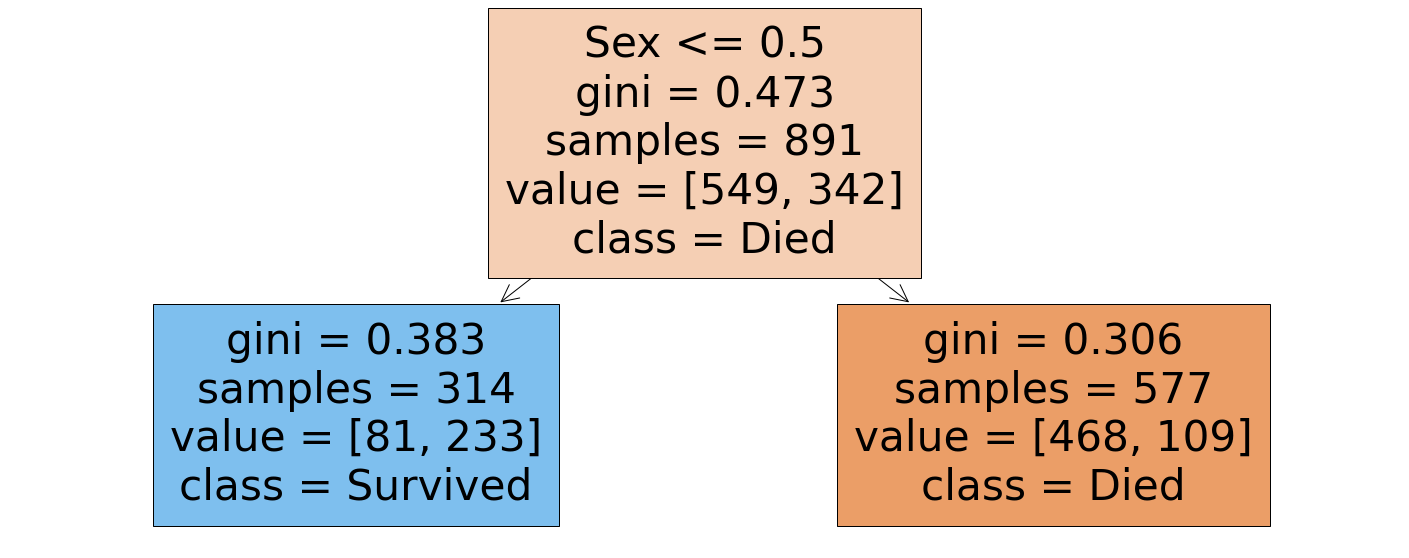

In [20]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf,
         filled=True,
         class_names= ['Died','Survived'],
         feature_names=['Sex']);


In [21]:
clf=clf.fit(x,y)


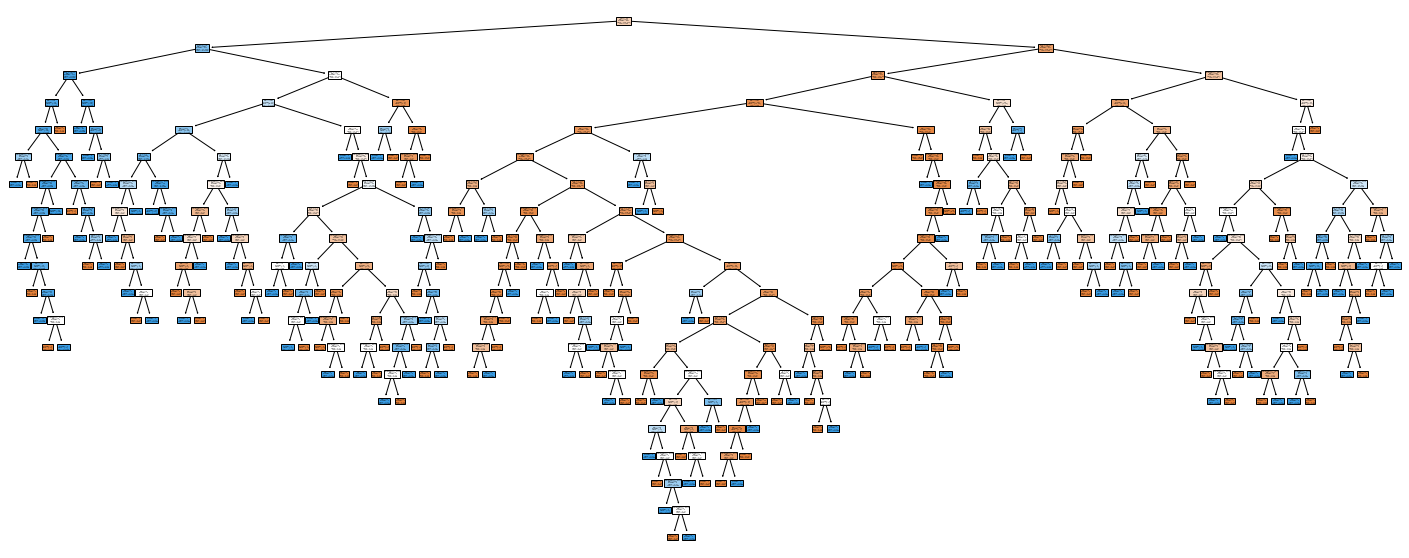

In [22]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf,
         filled=True,
         class_names= ['Died','Survived'],
         feature_names=x.columns);

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


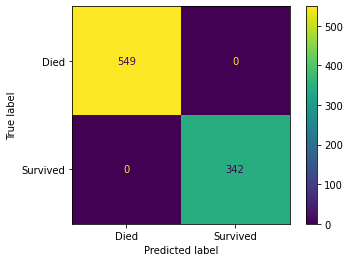

In [23]:
plot_confusion_matrix(clf,x,y,display_labels=['Died','Survived'])
plt.show()

In [24]:
predict=clf.predict(x)


In [25]:
accuracy_score(y,predict)

1.0

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.75,random_state=42)

In [27]:
y_test.shape

(223,)

In [28]:
clf = DecisionTreeClassifier(random_state=42)
clf=clf.fit(x_train,y_train)

In [29]:
predict=clf.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


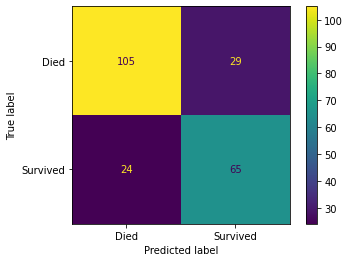

In [30]:
plot_confusion_matrix(clf,x_test,y_test,display_labels=['Died','Survived'])

In [31]:
accuracy_score(y_test,predict)

0.7623318385650224

In [32]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [33]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13793862272675983


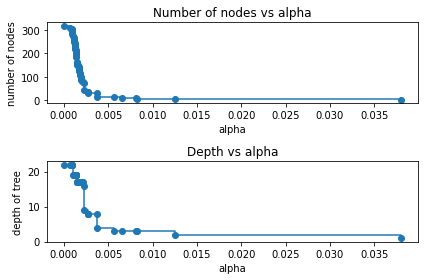

In [34]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

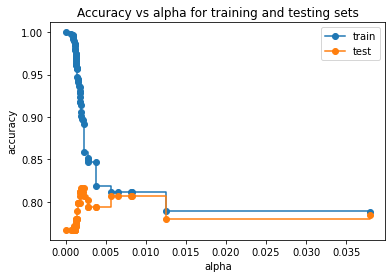

In [35]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
alphas=pd.DataFrame(ccp_alphas.tolist())
score=pd.DataFrame(test_scores)
alpha_df=pd.concat([alphas,score],axis=1)
ccp_alpha=0.002232

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


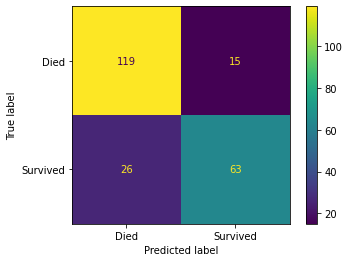

In [37]:
clf_podada = DecisionTreeClassifier(random_state=42,ccp_alpha=0.002232)
clf_podada=clf_podada.fit(x_train,y_train)
plot_confusion_matrix(clf_podada,x_test,y_test,display_labels=['Died','Survived'])

In [38]:
y_chapeu=clf_podada.predict(x_test)

In [39]:
accuracy_score(y_test,y_chapeu)


0.8161434977578476

In [40]:
finalizar=pd.DataFrame(test_df['PassengerId'])
final=clf_podada.predict(test_df2)
final1=pd.DataFrame(final,columns=['Survived'])


In [41]:
sub=pd.concat([finalizar,final1],axis=1)
sub.to_csv('submission.csv',index=False)
